In [56]:
import sklearn_crfsuite
from sklearn_crfsuite import scorers, CRF
from sklearn_crfsuite import metrics
from sklearn_crfsuite.metrics import flat_classification_report
import pandas as pd
import numpy as np
import imp, sys
sys.path.append('./src/')
import feature_utils
import seaborn as sns

In [2]:
vec_dim = 300

In [3]:
sent_vec_db = pd.read_csv("sentVec_merged.csv")

In [4]:
sent_db = pd.read_csv("sent_db.csv")
sent_db

,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len
0,טוב אהלן נ,0.0,0.0,0.0,0.0,0.0,0.0,therapist,not_nar,0.0,10.0
1,היי מה העניינים,0.0,1.0,0.0,0.0,1.0,1.0,client,not_nar,0.0,15.0
2,בסדר,0.0,2.0,0.0,0.0,2.0,2.0,therapist,not_nar,0.0,4.0
3,מה שלומך,1.0,2.0,0.0,0.0,2.0,2.0,therapist,not_nar,0.0,8.0
4,אה מורכב מורכב יותר אה היה שבוע עדיין אה כאילו...,0.0,3.0,0.0,0.0,3.0,3.0,client,not_nar,0.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...
2797,אני חושבת שיש הרבה דברים בחיים שלך שמרגישים כ...,0.0,1221.0,0.0,5.0,1161.0,81.0,therapist,not_nar,0.0,54.0
2798,ואני חושבת שכשהגעת לכאן בחרת לא להחמיץ יותר,1.0,1221.0,0.0,5.0,1161.0,81.0,therapist,not_nar,0.0,43.0
2799,אמנם אנחנו מדברות הרבה על העבר אבל אני חושבת ש...,2.0,1221.0,0.0,5.0,1161.0,81.0,therapist,not_nar,0.0,118.0
2800,וכשאת מתארת לי שאת ביום שבת מסתכלת על יום שישי...,3.0,1221.0,0.0,5.0,1161.0,81.0,therapist,not_nar,0.0,175.0


## See average length of nar/non-narrative

<AxesSubplot:xlabel='doc_idx'>

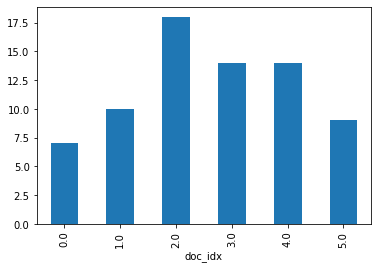

In [80]:
sent_db.groupby('doc_idx')['nar_idx'].nunique().plot(kind="bar")

### Reduce sentense vector dimention

In [112]:
imp.reload(feature_utils)
vec_dim = 100
sent_vec_db = feature_utils.get_vector_per_sentence(sent_db,vec_dim)

In [117]:
sent_vec_db

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.138599,-0.096820,-0.174321,0.222924,-0.148696,0.066023,0.101225,-0.000162,-0.093035,0.077146,...,-0.047915,-0.028008,0.063247,-0.001789,0.007698,-0.061541,0.032483,-0.029926,0.017986,-0.026208
1,-0.020493,-0.141783,-0.130254,0.169835,0.019954,0.143131,0.019932,0.111540,-0.123074,0.137342,...,-0.015510,-0.051327,0.003072,-0.055829,0.072944,-0.071851,-0.031716,-0.044284,-0.049985,0.013579
2,0.192754,-0.230258,-0.030094,0.233493,-0.024092,0.079723,-0.085085,-0.007812,-0.073863,0.232659,...,0.069224,0.037111,-0.007996,0.004572,0.089544,0.016802,-0.009449,-0.055555,-0.052510,0.033660
3,-0.134184,-0.180747,-0.201870,0.284047,-0.067244,0.253054,0.001805,0.182225,-0.071756,0.105945,...,-0.104319,0.008128,0.030196,-0.105457,0.051868,-0.134151,-0.068187,-0.091847,0.021294,0.045050
4,-0.001123,-0.125134,-0.155144,0.169363,-0.052581,0.072291,-0.061323,0.065979,-0.082027,0.055445,...,-0.001159,0.004055,0.002636,-0.031743,0.001414,-0.003289,-0.020877,-0.038131,-0.007414,0.000061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,0.161532,-0.160209,0.006921,0.267997,-0.053357,0.086570,0.026997,0.148239,-0.081829,0.049662,...,-0.003090,-0.070616,-0.011035,0.001396,0.022161,-0.022125,-0.051298,-0.027882,-0.052106,0.007494
2798,0.090497,-0.120948,-0.081757,0.226838,-0.000226,0.056493,0.014159,0.092399,-0.059482,0.046522,...,0.010789,-0.012490,0.003682,-0.004003,0.026452,-0.003934,-0.019849,-0.029960,-0.020004,0.008696
2799,0.103336,-0.111161,-0.086626,0.175387,-0.005767,0.111205,-0.038382,0.091540,-0.125620,0.077630,...,-0.014342,-0.032188,-0.042315,-0.022714,0.007216,-0.014697,-0.016104,-0.039597,-0.045776,-0.016191
2800,0.019440,-0.140911,-0.136421,0.197372,-0.032789,0.104796,-0.045411,0.083636,-0.113793,0.084624,...,-0.019371,-0.032402,-0.021236,-0.019459,0.011951,-0.026242,-0.009478,-0.042342,-0.045484,-0.010175


## Define boundaries of sequence item

In [118]:
# split by 4sentences?
seq_len = 4 # take 4 sentences as sequence
narFirstIdx = sent_db.query("fist_sent_in_nar == 1").index

In [119]:
narLastIdx = sent_db.query("last_sent_in_nar == 1").index

In [120]:
narFirstIdx, narLastIdx

(Int64Index([   5,   17,  196,  269,  316,  467,  585,  637,  664,  674,  734,
              763,  831,  892,  934, 1046, 1067, 1074, 1078, 1142, 1200, 1229,
             1267, 1290, 1307, 1316, 1348, 1373, 1392, 1414, 1440, 1443, 1548,
             1619, 1681, 1756, 1831, 1852, 1931, 1938, 1983, 1996, 2030, 2059,
             2072, 2162, 2176, 2183, 2198, 2220, 2224, 2234, 2257, 2260, 2373,
             2439, 2466, 2517, 2542, 2559, 2571, 2715, 2720, 2748, 2765, 2792],
            dtype='int64'),
 Int64Index([  13,  140,  230,  274,  329,  475,  592,  644,  673,  679,  743,
              764,  879,  898,  939, 1050, 1067, 1076, 1122, 1177, 1210, 1239,
             1274, 1293, 1310, 1330, 1370, 1386, 1411, 1427, 1442, 1455, 1591,
             1645, 1705, 1769, 1851, 1913, 1935, 1940, 1990, 2019, 2051, 2069,
             2079, 2175, 2182, 2197, 2211, 2221, 2231, 2256, 2257, 2344, 2389,
             2441, 2479, 2522, 2544, 2563, 2580, 2716, 2725, 2750, 2791, 2796],
            dtype='int

In [138]:
indices_for_sequence = sent_db.index[:sent_db.shape[0]-seq_len:4]
print(indices_for_sequence)

RangeIndex(start=0, stop=2798, step=4)


In [139]:
sent_vec_db

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.138599,-0.096820,-0.174321,0.222924,-0.148696,0.066023,0.101225,-0.000162,-0.093035,0.077146,...,-0.047915,-0.028008,0.063247,-0.001789,0.007698,-0.061541,0.032483,-0.029926,0.017986,-0.026208
1,-0.020493,-0.141783,-0.130254,0.169835,0.019954,0.143131,0.019932,0.111540,-0.123074,0.137342,...,-0.015510,-0.051327,0.003072,-0.055829,0.072944,-0.071851,-0.031716,-0.044284,-0.049985,0.013579
2,0.192754,-0.230258,-0.030094,0.233493,-0.024092,0.079723,-0.085085,-0.007812,-0.073863,0.232659,...,0.069224,0.037111,-0.007996,0.004572,0.089544,0.016802,-0.009449,-0.055555,-0.052510,0.033660
3,-0.134184,-0.180747,-0.201870,0.284047,-0.067244,0.253054,0.001805,0.182225,-0.071756,0.105945,...,-0.104319,0.008128,0.030196,-0.105457,0.051868,-0.134151,-0.068187,-0.091847,0.021294,0.045050
4,-0.001123,-0.125134,-0.155144,0.169363,-0.052581,0.072291,-0.061323,0.065979,-0.082027,0.055445,...,-0.001159,0.004055,0.002636,-0.031743,0.001414,-0.003289,-0.020877,-0.038131,-0.007414,0.000061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2797,0.161532,-0.160209,0.006921,0.267997,-0.053357,0.086570,0.026997,0.148239,-0.081829,0.049662,...,-0.003090,-0.070616,-0.011035,0.001396,0.022161,-0.022125,-0.051298,-0.027882,-0.052106,0.007494
2798,0.090497,-0.120948,-0.081757,0.226838,-0.000226,0.056493,0.014159,0.092399,-0.059482,0.046522,...,0.010789,-0.012490,0.003682,-0.004003,0.026452,-0.003934,-0.019849,-0.029960,-0.020004,0.008696
2799,0.103336,-0.111161,-0.086626,0.175387,-0.005767,0.111205,-0.038382,0.091540,-0.125620,0.077630,...,-0.014342,-0.032188,-0.042315,-0.022714,0.007216,-0.014697,-0.016104,-0.039597,-0.045776,-0.016191
2800,0.019440,-0.140911,-0.136421,0.197372,-0.032789,0.104796,-0.045411,0.083636,-0.113793,0.084624,...,-0.019371,-0.032402,-0.021236,-0.019459,0.011951,-0.026242,-0.009478,-0.042342,-0.045484,-0.010175


{...
 'v0': 1.81583762e-02,
 'v1': 2.83553465e-02,
  ...
 'v299': -4.26079705e-02,
 ...}

In [140]:
def get_sent_vec(idx):
    return sent_vec_db.iloc[idx,:vec_dim]

In [141]:
def sent_is_first_in_nar(idx):
    return sent_db.loc[idx,'fist_sent_in_nar']
def sent_is_last_in_nar(idx):
    return sent_db.loc[idx,'last_sent_in_nar']
def sent_is_out_nar(idx):
    return (sent_db.loc[idx,'is_nar'] == 0)
def get_sent_label(idx):
    return sent_db.loc[idx,'is_nar']

In [143]:
# Feature set
def sent2features(sent_idx): 
    sent_vec = get_sent_vec(sent_idx)
    features = {}
    for idx,val in enumerate(sent_vec):
        features["v{}".format(idx)] = val
    
    #BOS - beginning
    #EOC - end
    #OS - out
    if(sent_idx%seq_len == 0):
        features['BOS'] = True # sent_is_first_in_nar(sent_idx)
    if(sent_idx%seq_len == seq_len-1):
        features['EOS'] = True # sent_is_last_in_nar(sent_idx)
#     features['OS'] = sent_is_out_nar(sent_idx)
    
#     if sent_idx > 1:
#         features.update({
#              '-1:one_before_is_nar': word1.lower(),
#         })
#     if sent_idx > 2 :
#         features.update({
#            '-1:one_before_is_nar': word1.lower(),
#            '-2:two_before_is_nar': word1.lower(),
#         })

    return features

In [186]:
def sent2labels(sent_idx):
    return "nar" if get_sent_label(sent_idx) == 1 else "not_nar"

In [193]:
def seq2features(seq_idx):
    seq = []
    for s in range(seq_idx,seq_idx+seq_len):
         seq.extend(sent2features(s))
    return seq

def seq2labels(seq_idx):
    seq = []
    for s in range(seq_idx,seq_idx+seq_len):
        label = sent2labels(s)
        seq.extend([label for i in range(vec_dim)]) # 2 - for 2 more featues EOS and BOS
    return seq

In [194]:
X = [seq2features(s) for s in indices_for_sequence]
y = [seq2labels(s) for s in indices_for_sequence]

In [195]:
X[0], y[0]

(['v0',
  'v1',
  'v2',
  'v3',
  'v4',
  'v5',
  'v6',
  'v7',
  'v8',
  'v9',
  'v10',
  'v11',
  'v12',
  'v13',
  'v14',
  'v15',
  'v16',
  'v17',
  'v18',
  'v19',
  'v20',
  'v21',
  'v22',
  'v23',
  'v24',
  'v25',
  'v26',
  'v27',
  'v28',
  'v29',
  'v30',
  'v31',
  'v32',
  'v33',
  'v34',
  'v35',
  'v36',
  'v37',
  'v38',
  'v39',
  'v40',
  'v41',
  'v42',
  'v43',
  'v44',
  'v45',
  'v46',
  'v47',
  'v48',
  'v49',
  'v50',
  'v51',
  'v52',
  'v53',
  'v54',
  'v55',
  'v56',
  'v57',
  'v58',
  'v59',
  'v60',
  'v61',
  'v62',
  'v63',
  'v64',
  'v65',
  'v66',
  'v67',
  'v68',
  'v69',
  'v70',
  'v71',
  'v72',
  'v73',
  'v74',
  'v75',
  'v76',
  'v77',
  'v78',
  'v79',
  'v80',
  'v81',
  'v82',
  'v83',
  'v84',
  'v85',
  'v86',
  'v87',
  'v88',
  'v89',
  'v90',
  'v91',
  'v92',
  'v93',
  'v94',
  'v95',
  'v96',
  'v97',
  'v98',
  'v99',
  'BOS',
  'v0',
  'v1',
  'v2',
  'v3',
  'v4',
  'v5',
  'v6',
  'v7',
  'v8',
  'v9',
  'v10',
  'v11',
  '

In [196]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [197]:
len(X_train), len(y_train), len(X_test), len(y_test)

(469, 469, 231, 231)

In [198]:
# from sklearn.metrics import make_scorer
# from sklearn_crfsuite import metrics
# f1_scorer = make_scorer(metrics.flat_f1_score, average='macro') 
from sklearn.model_selection import cross_validate

crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
#     all_possible_transitions=True,
)
try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass
predictions = crf.predict(X_test)
# pred = cross_val_predict(estimator=crf, X=X_train, y=y_train, cv=5)
# scores = cross_validate(crf, X, y, scoring="f1_macro", cv=5)
# print(scores.test_score)

ValueError: The numbers of items and labels differ: |x| = 402, |y| = 408

In [171]:
predictions
# feature_utils.get_prediction_report(y_test,predictions)

[['v0',
  'v1',
  'v2',
  'v3',
  'v4',
  'v5',
  'v6',
  'v7',
  'v8',
  'v9',
  'v10',
  'v11',
  'v12',
  'v13',
  'v14',
  'v15',
  'v16',
  'v17',
  'v18',
  'v19',
  'v20',
  'v21',
  'v22',
  'v23',
  'v24',
  'v25',
  'v26',
  'v27',
  'v28',
  'v29',
  'v30',
  'v31',
  'v32',
  'v33',
  'v34',
  'v35',
  'v36',
  'v37',
  'v38',
  'v39',
  'v40',
  'v41',
  'v42',
  'v43',
  'v44',
  'v45',
  'v46',
  'v47',
  'v48',
  'v49',
  'v50',
  'v51',
  'v52',
  'v53',
  'v54',
  'v55',
  'v56',
  'v57',
  'v58',
  'v59',
  'v60',
  'v61',
  'v62',
  'v63',
  'v64',
  'v65',
  'v66',
  'v67',
  'v68',
  'v69',
  'v70',
  'v71',
  'v72',
  'v73',
  'v74',
  'v75',
  'v76',
  'v77',
  'v78',
  'v79',
  'v80',
  'v81',
  'v82',
  'v83',
  'v84',
  'v85',
  'v86',
  'v87',
  'v88',
  'v89',
  'v90',
  'v91',
  'v92',
  'v93',
  'v94',
  'v95',
  'v96',
  'v97',
  'v98',
  'v99',
  'BOS',
  'v0',
  'v1',
  'v2',
  'v3',
  'v4',
  'v5',
  'v6',
  'v7',
  'v8',
  'v9',
  'v10',
  'v11',
  '

In [51]:
sent_vec_db

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,is_nar,sent_len
0,-0.114521,0.000108,0.036471,-0.024207,0.002051,0.014730,-0.104159,0.058651,0.005404,0.056529,...,-0.002414,0.039244,-0.094238,0.025045,0.097398,-0.004409,0.041561,-0.049388,0.0,9.0
1,-0.013333,0.000648,0.013545,-0.001843,0.037912,0.044653,-0.033737,0.020353,-0.039255,0.040033,...,0.038335,0.013976,-0.062025,-0.025751,-0.032749,0.038144,-0.012054,0.083821,0.0,7.0
2,-0.049959,0.006207,0.019215,-0.013564,-0.006140,-0.020194,-0.021590,0.033078,0.043775,0.076063,...,-0.021449,-0.031051,-0.009857,0.012590,0.040845,-0.031004,0.001470,-0.049673,0.0,6.0
3,-0.009683,0.047087,0.037459,0.019149,0.005652,-0.042241,0.013978,0.052192,-0.023080,0.002327,...,-0.029806,0.033418,-0.029150,0.014673,0.022372,0.058281,0.031803,-0.026994,0.0,18.0
4,0.060957,0.005640,-0.018319,-0.002478,0.010457,-0.024910,0.091064,0.000475,0.066396,-0.038925,...,-0.024806,-0.046600,-0.026737,-0.015007,0.005086,0.030338,0.038523,-0.014919,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,0.044579,0.024742,0.028893,-0.060388,0.039829,0.025243,-0.117620,-0.028324,0.013425,-0.002992,...,-0.027126,-0.003454,-0.037883,0.018410,0.046375,0.052125,-0.023152,0.060160,0.0,3.0
2835,0.017902,0.038459,-0.016246,-0.003681,-0.026354,0.042227,0.019360,0.023875,-0.001420,0.015527,...,-0.022408,0.012324,-0.014626,0.004259,0.006237,0.035307,0.027554,-0.016158,0.0,30.0
2836,0.013650,0.023375,0.017228,0.000760,0.006687,0.010800,-0.005754,0.013923,0.009729,0.018878,...,-0.015082,0.006376,-0.010457,0.021521,-0.011850,0.022129,0.016181,0.004594,0.0,37.0
2837,0.009727,0.017978,0.027529,0.006578,0.020192,-0.020603,0.027635,0.017854,0.040842,0.017801,...,-0.019581,-0.002811,-0.012890,0.033547,0.007128,-0.002388,0.006980,-0.007728,0.0,23.0
